In [1]:
# import các thư viện
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# mapping
labels = {
    "Others": 0,
    "Honda": 1,
    "Suzuki": 2,
    "Yamaha": 3,
    "VinFast": 4
}
reverse_map_labels = {
    0: "Others",
    1: "Honda",
    2: "Suzuki",
    3: "Yamaha",
    4: "VinFast"
}

In [4]:
path = "/content/drive/MyDrive/Public"
output_dir = 'MotocycleDataset.csv'

In [5]:

d1 = []

In [6]:
error = pd.read_csv('/content/invalid_image_paths(1).csv')

In [7]:
error_paths = error.iloc[:, 0].unique().tolist()

In [8]:
error_paths

['Honda/22520968-22520996-22520999-22520929-22521373.Honda.1380.jpg',
 'Honda/22520968-22520996-22520999-22520929-22521373.Honda.1418.jpg',
 'Honda/22520968-22520996-22520999-22520929-22521373.Honda.212.jpg',
 'Honda/22520968-22520996-22520999-22520929-22521373.Honda.251.jpg',
 'Honda/22520968-22520996-22520999-22520929-22521373.Honda.732.jpg',
 'VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.213.jpg',
 'VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.311.jpg',
 'VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.313.jpg',
 'VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.398.jpg',
 'Others/22520968-22520996-22520999-22520929-22521373.Others.567.jpg',
 'Others/22520968-22520996-22520999-22520929-22521373.Others.102.jpg',
 'Others/22520968-22520996-22520999-22520929-22521373.Others.159.jpg',
 'VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.59.jpg',
 'VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.277.jpg',
 'V

In [9]:
def read_path(path, out_put):
    data = []
    supported_formats = ['jpg', 'png', 'jpeg']

    for label in os.listdir(path):
        if label in labels:
            y = labels[label]
            new_path = os.path.join(path, label)
            if os.listdir(new_path):
                for img in os.listdir(new_path):
                    if any(img.lower().endswith(fmt) for fmt in supported_formats):
                        path_img = os.path.join(label, img)
                        if path_img not in error_paths:
                          data.append((path_img, int(y)))

    df = pd.DataFrame(data, columns=['ImageFullPath', 'CategoryID'])
    df.to_csv(out_put, sep=',', index=False)
    return df

In [10]:
# # create file MotocycleDataset.csv
# def read_path1(path,out_put):
#   data = []
#   for label in os.listdir(path):
#     if label in labels:
#         y = labels[label]
#         new_path = os.path.join(path,label)
#         if os.listdir(new_path):
#           for img in os.listdir(new_path):
#                 type_img = img.split('.')[-1]

#                 if type_img == 'jfif' or type_img == 'webp' or type_img == 'jpe' or type_img == 'gif' or type_img == 'avif':
#                   path_img = os.path.join(label,img)
#                   d1.append(path_img)
#     #           if img.endswith('jpg') or img.endswith('jpeg') or img.endswith('png'):
#     #             path_img = os.path.join(label,img)
#     #             data.append((path_img,int(y)))
#     # df = pd.DataFrame(data,columns = ['ImageFullPath','CategoryID'])
#     # df.to_csv(out_put, sep=',',index=False)
#     # return d1

In [11]:
a = read_path(path,output_dir)

In [12]:
# d1

In [13]:
print(len(a))

34891


In [14]:
def show_image(img_path):
    img = Image.open(img_path).convert('RGBA')
    plt.imshow(img)
    plt.axis('off')  # Tắt trục tọa độ
    plt.show()

In [15]:
path = '/content/drive/MyDrive/Public/Others/22520968-22520996-22520999-22520929-22521373.Others.561.jpg'

So sánh thời gian đọc ảnh của pil và cv2

In [16]:
import cv2
from PIL import Image
import time
import numpy as np

# Đường dẫn đến ảnh mẫu
img_path = '/content/drive/MyDrive/Public/Others/22520968-22520996-22520999-22520929-22521373.Others.566.jpg'

# Sử dụng PIL để đọc và chuyển đổi ảnh
start_time = time.time()
img_pil = Image.open(img_path).convert('RGB')
end_time = time.time()
pil_time = end_time - start_time

# Sử dụng OpenCV để đọc và chuyển đổi ảnh, sau đó chuyển đổi sang PIL
start_time = time.time()
img_cv2 = cv2.imread(img_path)
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
img_pil_from_cv2 = Image.fromarray(img_cv2_rgb)
end_time = time.time()
cv2_time = end_time - start_time

# In ra thời gian xử lý
print(f"Thời gian xử lý bằng PIL: {pil_time} giây")
print(f"Thời gian xử lý bằng OpenCV và chuyển đổi sang PIL: {cv2_time} giây")

Thời gian xử lý bằng PIL: 0.2290937900543213 giây
Thời gian xử lý bằng OpenCV và chuyển đổi sang PIL: 0.06419754028320312 giây


In [17]:

img = Image.open(path)

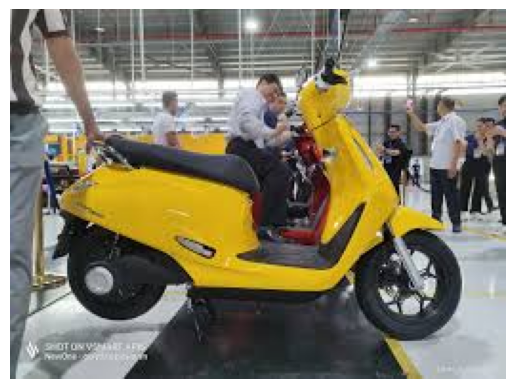

In [18]:
show_image('/content/drive/MyDrive/Public/VinFast/22520968-22520996-22520999-22520929-22521373.VinFast.561.jpg')

In [48]:
path1 = "/content/drive/MyDrive/Public"
img_path = "/content/MotocycleDataset.csv"

In [49]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2

In [50]:

from zipfile import ZipFile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from sklearn.model_selection import train_test_split
from collections import Counter


In [133]:
data = pd.read_csv(img_path)
img = data['ImageFullPath']
label = data['CategoryID']
image = [os.path.join(path1, i) for i in img]

In [134]:
len(image)

34891

In [135]:
# label = data[data['CategoryID'] == 4]

In [136]:
# print(len(label))

In [137]:
trainX, testX, trainY, testY = train_test_split(image, label, test_size=0.3, random_state=30)
train_label_count = Counter(trainY)
test_label_count = Counter(testY)

In [138]:
testX, valX, testY, valY = train_test_split(testX, testY, test_size=0.3, random_state=30)

In [139]:
train_label_count

Counter({1: 6781, 2: 4584, 0: 4560, 3: 5810, 4: 2688})

In [140]:
test_label_count

Counter({3: 2466, 0: 1933, 1: 2956, 4: 1174, 2: 1939})

In [141]:
print(len(trainX))
print(len(testX))
print(len(valX))

24423
7327
3141


In [142]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [143]:
class CustomDataset(Dataset):
    def __init__(self, img_paths, labels, num_classes, transform=None):
        self.img_paths = img_paths
        self.labels = np.array(labels)  # Convert labels to numpy array
        self.num_classes = num_classes
        self.transform = transform
    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        label = self.labels[idx]  # Retrieve label as integer

        img_cv2 = cv2.imread(img_path)
        img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
        img_pil_from_cv2 = Image.fromarray(img_cv2_rgb)

        if self.transform:
            img_pil_from_cv2 = self.transform(img_pil_from_cv2)

        # Convert image to float32
        img_pil_from_cv2 = img_pil_from_cv2.to(dtype=torch.float32)

        return img_pil_from_cv2,torch.tensor(label, dtype=torch.long)

In [164]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(160),
        # torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(160),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(160),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

In [165]:
from torch.utils.data import Dataset, DataLoader


In [166]:
train_set = CustomDataset(trainX, trainY, num_classes = 5, transform=data_transforms['train'])
val_set = CustomDataset(valX,valY, num_classes = 5, transform=data_transforms['val'])
test_set = CustomDataset(testX,testY, num_classes = 5, transform=data_transforms['test'])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True, pin_memory=True,num_workers=8)
val_loader = DataLoader(val_set, batch_size=32, shuffle=True, pin_memory=True,num_workers= 8)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False,pin_memory=True,num_workers= 8)

In [167]:
for i in test_loader:
  a,b = i
  print(a)
  print(b)
  break

tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  0.5373,  0.5922,  0.6549],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.5294,  0.5451,  0.6235],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.5294,  0.5294,  0.5608],
          ...,
          [-0.8510, -0.8118, -0.7647,  ..., -0.5843, -0.5216, -0.6314],
          [-0.8275, -0.8196, -0.8039,  ..., -0.6471, -0.4980, -0.6078],
          [-0.7961, -0.7804, -0.7725,  ..., -0.7412, -0.5294, -0.5373]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.5451,  0.6157,  0.6784],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.5451,  0.5686,  0.6471],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.5451,  0.5529,  0.5843],
          ...,
          [-0.8431, -0.8039, -0.7569,  ..., -0.5765, -0.5137, -0.6235],
          [-0.8196, -0.8118, -0.7961,  ..., -0.6392, -0.4902, -0.6000],
          [-0.7882, -0.7725, -0.7647,  ..., -0.7333, -0.5216, -0.5294]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.5922,  0.6549,  0.7176],
          [ 1.0000,  1.0000,  

In [66]:
print(len(train_loader.dataset))
print(len(test_loader.dataset))

24423
7327


In [67]:
def show_batch_images(images, labels, mean, std, max_images=16):
    plt.figure(figsize=(12, 12))
    for i in range(min(len(images), max_images)):
        image = images[i].numpy().transpose((1, 2, 0))  # Chuyển tensor từ dạng (C, H, W) sang (H, W, C)

        # Hoàn tác chuẩn hóa
        image = std * image + mean
        image = np.clip(image, 0, 1)  # Đảm bảo giá trị nằm trong khoảng [0, 1]

        plt.subplot(4, 4, i + 1)  # 4 hàng và 4 cột
        plt.imshow(image)
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

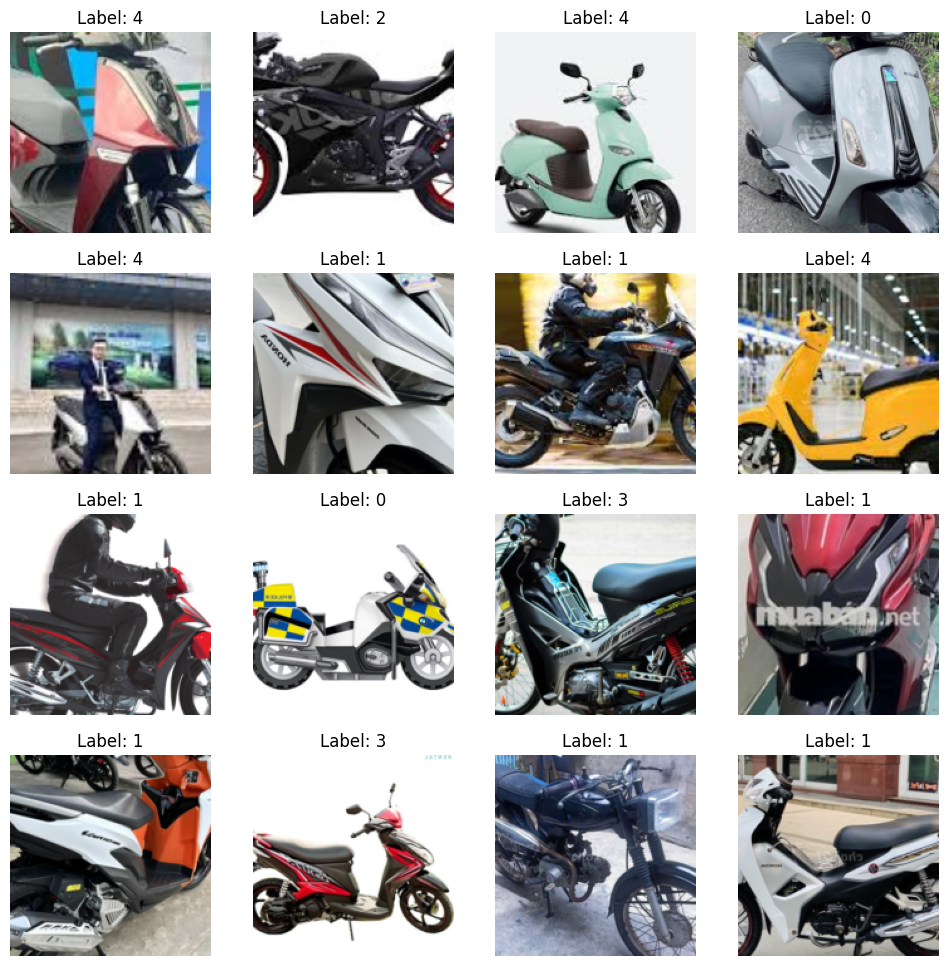

In [68]:
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.5,0.5,0.5])

for images, labels in train_loader:
    show_batch_images(images, labels, mean, std)
    break

In [76]:
from tempfile import TemporaryDirectory
import torch.optim as optim
import time


In [77]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [78]:
device

device(type='cuda')

In [79]:
import copy

In [80]:
!pip install tqdm

In [81]:
from tqdm import tqdm

In [95]:
import torch
import time
from tqdm import tqdm

def train_model(model, criterion, optimizer, scheduler, num_epochs=15):
    since = time.time()
    best_model_params_path = '/content/drive/MyDrive/bao/best_model_params1.pt'
    torch.save(model.state_dict(), best_model_params_path)
    best_acc = 0.0

    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    scaler = torch.cuda.amp.GradScaler()

    for epoch in range(num_epochs):
        torch.cuda.empty_cache()
        print(f'Epoch {epoch+1}/{num_epochs - 1}')
        print('-' * 30)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0
            image_counter = 0

            # Sử dụng tqdm để tạo thanh tiến trình
            for inputs, labels in tqdm(dataloader, desc=f'{phase} {epoch+1}/{num_epochs - 1}'):
                inputs = inputs.to(device)
                labels = labels.to(device)
                image_counter += len(inputs)  # Update counter
                if image_counter % 200 == 0:
                    print(f'Processed {image_counter} images in phase: {phase}, epoch: {epoch+1}')

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    with torch.cuda.amp.autocast():
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        scaler.scale(loss).backward()
                        scaler.step(optimizer)
                        scaler.update()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc)
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc)

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), best_model_params_path)

        # Giải phóng bộ nhớ cache sau mỗi epoch


        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print('time_start:', since)
    print('time_end:', time.time())
    print(f'Best val Acc: {best_acc:4f}')

    model.load_state_dict(torch.load(best_model_params_path))

    return model, train_loss_history, val_loss_history, train_acc_history, val_acc_history


In [105]:
def plot_training_history(train_loss_history, val_loss_history, train_acc_history, val_acc_history):
    # Ensure that the histories are converted to NumPy arrays if they are tensors
    if isinstance(train_loss_history, torch.Tensor):
        train_loss_history = train_loss_history.detach().cpu().numpy()
    if isinstance(val_loss_history, torch.Tensor):
        val_loss_history = val_loss_history.detach().cpu().numpy()
    if isinstance(train_acc_history, torch.Tensor):
        train_acc_history = train_acc_history.detach().cpu().numpy()
    if isinstance(val_acc_history, torch.Tensor):
        val_acc_history = val_acc_history.detach().cpu().numpy()

    # Vẽ biểu đồ loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Vẽ biểu đồ accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()

In [97]:
import torchvision.models as models
from torch.optim import lr_scheduler

In [98]:
model_ft = models.resnet50(weights='ResNet50_Weights.IMAGENET1K_V2')

# Freeze model parameters
for param in model_ft.parameters():
    param.requires_grad = False

# Replace the last fully connected layer with a new one
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 5)
)

# Move model to device (GPU if available)
model_ft = model_ft.to(device)

# Print the modified model architecture
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [99]:
criterion = nn.CrossEntropyLoss()

# Define optimizer (SGD with momentum)
optimizer = optim.AdamW(model_ft.parameters(), lr=0.001, weight_decay=0.01)

# Define learning rate scheduler (decay LR by a factor of 0.1 every 7 epochs)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [100]:
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [101]:
model_ft, train_loss_history, val_loss_history, train_acc_history, val_acc_history = train_model(model_ft, criterion,optimizer,exp_lr_scheduler, num_epochs=15)

Epoch 1/14
------------------------------


train 1/14:   3%|▎         | 24/764 [00:29<10:02,  1.23it/s]

Processed 800 images in phase: train, epoch: 1


train 1/14:   7%|▋         | 52/764 [01:06<12:04,  1.02s/it]

Processed 1600 images in phase: train, epoch: 1


train 1/14:  10%|▉         | 75/764 [01:36<13:18,  1.16s/it]

Processed 2400 images in phase: train, epoch: 1


train 1/14:  13%|█▎        | 99/764 [02:05<12:07,  1.09s/it]

Processed 3200 images in phase: train, epoch: 1


train 1/14:  16%|█▌        | 123/764 [02:33<11:38,  1.09s/it]

Processed 4000 images in phase: train, epoch: 1


train 1/14:  19%|█▉        | 147/764 [03:01<11:11,  1.09s/it]

Processed 4800 images in phase: train, epoch: 1


train 1/14:  22%|██▏       | 171/764 [03:28<12:04,  1.22s/it]

Processed 5600 images in phase: train, epoch: 1


train 1/14:  26%|██▌       | 199/764 [04:01<10:11,  1.08s/it]

Processed 6400 images in phase: train, epoch: 1


train 1/14:  30%|███       | 231/764 [04:38<08:19,  1.07it/s]

Processed 7200 images in phase: train, epoch: 1


train 1/14:  33%|███▎      | 252/764 [05:08<10:46,  1.26s/it]

Processed 8000 images in phase: train, epoch: 1


train 1/14:  37%|███▋      | 280/764 [05:37<07:13,  1.12it/s]

Processed 8800 images in phase: train, epoch: 1


train 1/14:  39%|███▉      | 299/764 [06:05<10:03,  1.30s/it]

Processed 9600 images in phase: train, epoch: 1


train 1/14:  42%|████▏     | 323/764 [06:31<08:13,  1.12s/it]

Processed 10400 images in phase: train, epoch: 1


train 1/14:  46%|████▌     | 351/764 [07:00<05:46,  1.19it/s]

Processed 11200 images in phase: train, epoch: 1


train 1/14:  49%|████▊     | 371/764 [07:26<07:23,  1.13s/it]

Processed 12000 images in phase: train, epoch: 1


train 1/14:  52%|█████▏    | 394/764 [07:56<09:25,  1.53s/it]

Processed 12800 images in phase: train, epoch: 1


train 1/14:  55%|█████▌    | 424/764 [08:26<04:35,  1.24it/s]

Processed 13600 images in phase: train, epoch: 1


train 1/14:  59%|█████▉    | 451/764 [09:04<06:58,  1.34s/it]

Processed 14400 images in phase: train, epoch: 1


train 1/14:  62%|██████▏   | 474/764 [09:35<08:38,  1.79s/it]

Processed 15200 images in phase: train, epoch: 1


train 1/14:  65%|██████▌   | 500/764 [10:06<06:09,  1.40s/it]

Processed 16000 images in phase: train, epoch: 1


train 1/14:  69%|██████▊   | 524/764 [10:32<04:37,  1.16s/it]

Processed 16800 images in phase: train, epoch: 1


train 1/14:  72%|███████▏  | 549/764 [11:01<04:04,  1.14s/it]

Processed 17600 images in phase: train, epoch: 1


train 1/14:  75%|███████▌  | 575/764 [11:28<02:40,  1.18it/s]

Processed 18400 images in phase: train, epoch: 1


train 1/14:  78%|███████▊  | 597/764 [11:58<03:23,  1.22s/it]

Processed 19200 images in phase: train, epoch: 1


train 1/14:  82%|████████▏ | 625/764 [12:28<02:20,  1.01s/it]

Processed 20000 images in phase: train, epoch: 1


train 1/14:  85%|████████▌ | 650/764 [13:01<02:43,  1.43s/it]

Processed 20800 images in phase: train, epoch: 1


train 1/14:  88%|████████▊ | 675/764 [13:30<01:56,  1.31s/it]

Processed 21600 images in phase: train, epoch: 1


train 1/14:  92%|█████████▏| 705/764 [13:58<00:47,  1.24it/s]

Processed 22400 images in phase: train, epoch: 1


train 1/14:  95%|█████████▌| 729/764 [14:26<00:28,  1.23it/s]

Processed 23200 images in phase: train, epoch: 1


train 1/14:  98%|█████████▊| 748/764 [14:54<00:20,  1.28s/it]

Processed 24000 images in phase: train, epoch: 1


train 1/14: 100%|██████████| 764/764 [15:12<00:00,  1.19s/it]


train Loss: 1.2657 Acc: 0.4729


val 1/14:  25%|██▌       | 25/99 [00:39<01:59,  1.62s/it]

Processed 800 images in phase: val, epoch: 1


val 1/14:  49%|████▉     | 49/99 [01:07<01:14,  1.49s/it]

Processed 1600 images in phase: val, epoch: 1


val 1/14:  76%|███████▌  | 75/99 [01:38<00:32,  1.35s/it]

Processed 2400 images in phase: val, epoch: 1


val 1/14: 100%|██████████| 99/99 [02:02<00:00,  1.23s/it]


val Loss: 1.1105 Acc: 0.5422

Epoch 2/14
------------------------------


train 2/14:   3%|▎         | 20/764 [00:05<02:43,  4.55it/s]

Processed 800 images in phase: train, epoch: 2


train 2/14:   7%|▋         | 51/764 [00:10<01:44,  6.84it/s]

Processed 1600 images in phase: train, epoch: 2


train 2/14:  10%|█         | 79/764 [00:15<01:52,  6.11it/s]

Processed 2400 images in phase: train, epoch: 2


train 2/14:  13%|█▎        | 101/764 [00:19<01:37,  6.81it/s]

Processed 3200 images in phase: train, epoch: 2


train 2/14:  17%|█▋        | 127/764 [00:23<01:16,  8.30it/s]

Processed 4000 images in phase: train, epoch: 2


train 2/14:  20%|█▉        | 150/764 [00:27<01:52,  5.47it/s]

Processed 4800 images in phase: train, epoch: 2


train 2/14:  23%|██▎       | 176/764 [00:32<01:34,  6.24it/s]

Processed 5600 images in phase: train, epoch: 2


train 2/14:  27%|██▋       | 203/764 [00:37<01:27,  6.41it/s]

Processed 6400 images in phase: train, epoch: 2


train 2/14:  30%|██▉       | 228/764 [00:41<01:10,  7.65it/s]

Processed 7200 images in phase: train, epoch: 2


train 2/14:  33%|███▎      | 251/764 [00:45<01:15,  6.79it/s]

Processed 8000 images in phase: train, epoch: 2


train 2/14:  36%|███▋      | 277/764 [00:50<01:24,  5.79it/s]

Processed 8800 images in phase: train, epoch: 2


train 2/14:  39%|███▉      | 300/764 [00:53<00:58,  8.00it/s]

Processed 9600 images in phase: train, epoch: 2


train 2/14:  42%|████▏     | 324/764 [00:57<00:58,  7.55it/s]

Processed 10400 images in phase: train, epoch: 2


train 2/14:  47%|████▋     | 357/764 [01:03<00:52,  7.75it/s]

Processed 11200 images in phase: train, epoch: 2


train 2/14:  50%|████▉     | 379/764 [01:06<00:45,  8.50it/s]

Processed 12000 images in phase: train, epoch: 2


train 2/14:  53%|█████▎    | 404/764 [01:11<00:54,  6.64it/s]

Processed 12800 images in phase: train, epoch: 2


train 2/14:  56%|█████▌    | 425/764 [01:16<00:52,  6.41it/s]

Processed 13600 images in phase: train, epoch: 2


train 2/14:  59%|█████▉    | 449/764 [01:20<00:55,  5.71it/s]

Processed 14400 images in phase: train, epoch: 2


train 2/14:  63%|██████▎   | 478/764 [01:25<00:42,  6.77it/s]

Processed 15200 images in phase: train, epoch: 2


train 2/14:  66%|██████▌   | 503/764 [01:29<00:30,  8.45it/s]

Processed 16000 images in phase: train, epoch: 2


train 2/14:  69%|██████▊   | 524/764 [01:33<00:38,  6.19it/s]

Processed 16800 images in phase: train, epoch: 2


train 2/14:  72%|███████▏  | 549/764 [01:38<00:39,  5.45it/s]

Processed 17600 images in phase: train, epoch: 2


train 2/14:  76%|███████▌  | 577/764 [01:42<00:25,  7.23it/s]

Processed 18400 images in phase: train, epoch: 2


train 2/14:  78%|███████▊  | 595/764 [01:46<00:32,  5.13it/s]

Processed 19200 images in phase: train, epoch: 2


train 2/14:  82%|████████▏ | 624/764 [01:50<00:18,  7.57it/s]

Processed 20000 images in phase: train, epoch: 2


train 2/14:  85%|████████▌ | 650/764 [01:55<00:20,  5.46it/s]

Processed 20800 images in phase: train, epoch: 2


train 2/14:  88%|████████▊ | 675/764 [02:00<00:13,  6.56it/s]

Processed 21600 images in phase: train, epoch: 2


train 2/14:  91%|█████████▏| 698/764 [02:04<00:09,  6.85it/s]

Processed 22400 images in phase: train, epoch: 2


train 2/14:  96%|█████████▌| 730/764 [02:10<00:04,  7.08it/s]

Processed 23200 images in phase: train, epoch: 2


train 2/14:  99%|█████████▉| 755/764 [02:15<00:01,  7.13it/s]

Processed 24000 images in phase: train, epoch: 2


train 2/14: 100%|██████████| 764/764 [02:16<00:00,  5.60it/s]


train Loss: 1.0933 Acc: 0.5568


val 2/14:  28%|██▊       | 28/99 [00:05<00:11,  6.31it/s]

Processed 800 images in phase: val, epoch: 2


val 2/14:  49%|████▉     | 49/99 [00:09<00:07,  6.95it/s]

Processed 1600 images in phase: val, epoch: 2


val 2/14:  75%|███████▍  | 74/99 [00:13<00:03,  6.72it/s]

Processed 2400 images in phase: val, epoch: 2


val 2/14: 100%|██████████| 99/99 [00:17<00:00,  5.64it/s]


val Loss: 1.0351 Acc: 0.5934

Epoch 3/14
------------------------------


train 3/14:   3%|▎         | 23/764 [00:05<01:41,  7.32it/s]

Processed 800 images in phase: train, epoch: 3


train 3/14:   7%|▋         | 50/764 [00:09<01:48,  6.56it/s]

Processed 1600 images in phase: train, epoch: 3


train 3/14:  10%|▉         | 75/764 [00:14<01:24,  8.20it/s]

Processed 2400 images in phase: train, epoch: 3


train 3/14:  13%|█▎        | 100/764 [00:18<01:20,  8.28it/s]

Processed 3200 images in phase: train, epoch: 3


train 3/14:  17%|█▋        | 130/764 [00:23<01:37,  6.49it/s]

Processed 4000 images in phase: train, epoch: 3


train 3/14:  20%|█▉        | 149/764 [00:27<01:44,  5.91it/s]

Processed 4800 images in phase: train, epoch: 3


train 3/14:  23%|██▎       | 177/764 [00:32<01:45,  5.58it/s]

Processed 5600 images in phase: train, epoch: 3


train 3/14:  26%|██▋       | 202/764 [00:36<01:21,  6.87it/s]

Processed 6400 images in phase: train, epoch: 3


train 3/14:  30%|███       | 230/764 [00:41<01:15,  7.10it/s]

Processed 7200 images in phase: train, epoch: 3


train 3/14:  33%|███▎      | 250/764 [00:44<01:13,  7.02it/s]

Processed 8000 images in phase: train, epoch: 3


train 3/14:  36%|███▌      | 275/764 [00:48<00:58,  8.40it/s]

Processed 8800 images in phase: train, epoch: 3


train 3/14:  39%|███▉      | 297/764 [00:54<02:06,  3.69it/s]

Processed 9600 images in phase: train, epoch: 3


train 3/14:  42%|████▏     | 324/764 [00:59<01:29,  4.91it/s]

Processed 10400 images in phase: train, epoch: 3


train 3/14:  46%|████▌     | 352/764 [01:03<00:49,  8.30it/s]

Processed 11200 images in phase: train, epoch: 3


train 3/14:  49%|████▉     | 375/764 [01:07<00:59,  6.55it/s]

Processed 12000 images in phase: train, epoch: 3


train 3/14:  52%|█████▏    | 398/764 [01:11<00:49,  7.40it/s]

Processed 12800 images in phase: train, epoch: 3


train 3/14:  57%|█████▋    | 432/764 [01:18<00:50,  6.59it/s]

Processed 13600 images in phase: train, epoch: 3


train 3/14:  60%|█████▉    | 456/764 [01:21<00:38,  8.01it/s]

Processed 14400 images in phase: train, epoch: 3


train 3/14:  62%|██████▏   | 475/764 [01:25<00:49,  5.88it/s]

Processed 15200 images in phase: train, epoch: 3


train 3/14:  65%|██████▌   | 499/764 [01:29<00:52,  5.00it/s]

Processed 16000 images in phase: train, epoch: 3


train 3/14:  69%|██████▊   | 524/764 [01:33<00:33,  7.08it/s]

Processed 16800 images in phase: train, epoch: 3


train 3/14:  73%|███████▎  | 556/764 [01:40<00:28,  7.37it/s]

Processed 17600 images in phase: train, epoch: 3


train 3/14:  75%|███████▌  | 574/764 [01:43<00:35,  5.35it/s]

Processed 18400 images in phase: train, epoch: 3


train 3/14:  78%|███████▊  | 599/764 [01:48<00:31,  5.24it/s]

Processed 19200 images in phase: train, epoch: 3


train 3/14:  82%|████████▏ | 623/764 [01:52<00:24,  5.80it/s]

Processed 20000 images in phase: train, epoch: 3


train 3/14:  86%|████████▌ | 654/764 [01:57<00:17,  6.19it/s]

Processed 20800 images in phase: train, epoch: 3


train 3/14:  89%|████████▊ | 677/764 [02:01<00:12,  7.14it/s]

Processed 21600 images in phase: train, epoch: 3


train 3/14:  91%|█████████▏| 698/764 [02:05<00:12,  5.43it/s]

Processed 22400 images in phase: train, epoch: 3


train 3/14:  95%|█████████▍| 725/764 [02:09<00:04,  8.21it/s]

Processed 23200 images in phase: train, epoch: 3


train 3/14:  99%|█████████▊| 753/764 [02:14<00:01,  7.56it/s]

Processed 24000 images in phase: train, epoch: 3


train 3/14: 100%|██████████| 764/764 [02:16<00:00,  5.61it/s]


train Loss: 1.0230 Acc: 0.5917


val 3/14:  24%|██▍       | 24/99 [00:04<00:09,  7.77it/s]

Processed 800 images in phase: val, epoch: 3


val 3/14:  55%|█████▍    | 54/99 [00:10<00:07,  6.26it/s]

Processed 1600 images in phase: val, epoch: 3


val 3/14:  83%|████████▎ | 82/99 [00:14<00:02,  8.03it/s]

Processed 2400 images in phase: val, epoch: 3


val 3/14: 100%|██████████| 99/99 [00:17<00:00,  5.78it/s]


val Loss: 0.9951 Acc: 0.5985

Epoch 4/14
------------------------------


train 4/14:   4%|▎         | 28/764 [00:05<01:48,  6.77it/s]

Processed 800 images in phase: train, epoch: 4


train 4/14:   7%|▋         | 53/764 [00:11<02:12,  5.37it/s]

Processed 1600 images in phase: train, epoch: 4


train 4/14:  10%|▉         | 76/764 [00:15<01:33,  7.37it/s]

Processed 2400 images in phase: train, epoch: 4


train 4/14:  13%|█▎        | 102/764 [00:20<01:55,  5.71it/s]

Processed 3200 images in phase: train, epoch: 4


train 4/14:  16%|█▋        | 126/764 [00:23<01:18,  8.13it/s]

Processed 4000 images in phase: train, epoch: 4


train 4/14:  20%|█▉        | 149/764 [00:28<01:34,  6.50it/s]

Processed 4800 images in phase: train, epoch: 4


train 4/14:  23%|██▎       | 179/764 [00:33<01:25,  6.81it/s]

Processed 5600 images in phase: train, epoch: 4


train 4/14:  26%|██▌       | 199/764 [00:36<01:27,  6.47it/s]

Processed 6400 images in phase: train, epoch: 4


train 4/14:  30%|██▉       | 229/764 [00:41<01:08,  7.76it/s]

Processed 7200 images in phase: train, epoch: 4


train 4/14:  33%|███▎      | 251/764 [00:45<01:38,  5.19it/s]

Processed 8000 images in phase: train, epoch: 4


train 4/14:  36%|███▌      | 275/764 [00:49<01:01,  7.94it/s]

Processed 8800 images in phase: train, epoch: 4


train 4/14:  40%|███▉      | 305/764 [00:55<01:18,  5.83it/s]

Processed 9600 images in phase: train, epoch: 4


train 4/14:  43%|████▎     | 330/764 [00:59<01:00,  7.17it/s]

Processed 10400 images in phase: train, epoch: 4


train 4/14:  46%|████▋     | 355/764 [01:03<00:57,  7.14it/s]

Processed 11200 images in phase: train, epoch: 4


train 4/14:  49%|████▉     | 373/764 [01:07<00:58,  6.69it/s]

Processed 12000 images in phase: train, epoch: 4


train 4/14:  53%|█████▎    | 402/764 [01:12<01:04,  5.63it/s]

Processed 12800 images in phase: train, epoch: 4


train 4/14:  56%|█████▌    | 425/764 [01:16<01:06,  5.07it/s]

Processed 13600 images in phase: train, epoch: 4


train 4/14:  59%|█████▊    | 448/764 [01:20<00:51,  6.13it/s]

Processed 14400 images in phase: train, epoch: 4


train 4/14:  63%|██████▎   | 478/764 [01:25<00:39,  7.16it/s]

Processed 15200 images in phase: train, epoch: 4


train 4/14:  66%|██████▌   | 503/764 [01:29<00:35,  7.39it/s]

Processed 16000 images in phase: train, epoch: 4


train 4/14:  68%|██████▊   | 522/764 [01:34<00:47,  5.13it/s]

Processed 16800 images in phase: train, epoch: 4


train 4/14:  73%|███████▎  | 555/764 [01:39<00:34,  6.00it/s]

Processed 17600 images in phase: train, epoch: 4


train 4/14:  75%|███████▌  | 576/764 [01:43<00:35,  5.29it/s]

Processed 18400 images in phase: train, epoch: 4


train 4/14:  79%|███████▉  | 603/764 [01:47<00:21,  7.55it/s]

Processed 19200 images in phase: train, epoch: 4


train 4/14:  82%|████████▏ | 627/764 [01:51<00:14,  9.38it/s]

Processed 20000 images in phase: train, epoch: 4


train 4/14:  85%|████████▌ | 652/764 [01:55<00:14,  7.51it/s]

Processed 20800 images in phase: train, epoch: 4


train 4/14:  88%|████████▊ | 675/764 [02:00<00:13,  6.72it/s]

Processed 21600 images in phase: train, epoch: 4


train 4/14:  92%|█████████▏| 703/764 [02:04<00:07,  8.38it/s]

Processed 22400 images in phase: train, epoch: 4


train 4/14:  95%|█████████▌| 728/764 [02:08<00:04,  7.85it/s]

Processed 23200 images in phase: train, epoch: 4


train 4/14:  98%|█████████▊| 749/764 [02:12<00:02,  6.49it/s]

Processed 24000 images in phase: train, epoch: 4


train 4/14: 100%|██████████| 764/764 [02:14<00:00,  5.67it/s]


train Loss: 0.9690 Acc: 0.6152


val 4/14:  25%|██▌       | 25/99 [00:05<00:10,  7.11it/s]

Processed 800 images in phase: val, epoch: 4


val 4/14:  53%|█████▎    | 52/99 [00:10<00:10,  4.31it/s]

Processed 1600 images in phase: val, epoch: 4


val 4/14:  79%|███████▉  | 78/99 [00:14<00:02,  8.03it/s]

Processed 2400 images in phase: val, epoch: 4


val 4/14: 100%|██████████| 99/99 [00:17<00:00,  5.55it/s]


val Loss: 0.9641 Acc: 0.6180

Epoch 5/14
------------------------------


train 5/14:   3%|▎         | 23/764 [00:05<01:43,  7.15it/s]

Processed 800 images in phase: train, epoch: 5


train 5/14:   7%|▋         | 57/764 [00:11<01:55,  6.12it/s]

Processed 1600 images in phase: train, epoch: 5


train 5/14:  10%|▉         | 74/764 [00:14<01:43,  6.66it/s]

Processed 2400 images in phase: train, epoch: 5


train 5/14:  13%|█▎        | 100/764 [00:18<01:13,  9.00it/s]

Processed 3200 images in phase: train, epoch: 5


train 5/14:  16%|█▌        | 122/764 [00:22<01:46,  6.03it/s]

Processed 4000 images in phase: train, epoch: 5


train 5/14:  20%|██        | 155/764 [00:27<01:19,  7.63it/s]

Processed 4800 images in phase: train, epoch: 5


train 5/14:  24%|██▎       | 180/764 [00:32<01:26,  6.72it/s]

Processed 5600 images in phase: train, epoch: 5


train 5/14:  27%|██▋       | 203/764 [00:36<01:22,  6.78it/s]

Processed 6400 images in phase: train, epoch: 5


train 5/14:  29%|██▉       | 224/764 [00:40<01:31,  5.92it/s]

Processed 7200 images in phase: train, epoch: 5


train 5/14:  33%|███▎      | 251/764 [00:45<01:39,  5.15it/s]

Processed 8000 images in phase: train, epoch: 5


train 5/14:  36%|███▌      | 276/764 [00:48<01:00,  8.11it/s]

Processed 8800 images in phase: train, epoch: 5


train 5/14:  39%|███▉      | 298/764 [00:52<01:01,  7.60it/s]

Processed 9600 images in phase: train, epoch: 5


train 5/14:  43%|████▎     | 325/764 [00:57<00:51,  8.58it/s]

Processed 10400 images in phase: train, epoch: 5


train 5/14:  46%|████▌     | 350/764 [01:01<01:17,  5.34it/s]

Processed 11200 images in phase: train, epoch: 5


train 5/14:  49%|████▉     | 375/764 [01:06<00:59,  6.56it/s]

Processed 12000 images in phase: train, epoch: 5


train 5/14:  52%|█████▏    | 398/764 [01:11<00:57,  6.38it/s]

Processed 12800 images in phase: train, epoch: 5


train 5/14:  57%|█████▋    | 432/764 [01:16<00:41,  7.93it/s]

Processed 13600 images in phase: train, epoch: 5


train 5/14:  60%|█████▉    | 455/764 [01:20<00:37,  8.31it/s]

Processed 14400 images in phase: train, epoch: 5


train 5/14:  62%|██████▏   | 474/764 [01:23<00:48,  5.99it/s]

Processed 15200 images in phase: train, epoch: 5


train 5/14:  65%|██████▌   | 498/764 [01:28<00:42,  6.30it/s]

Processed 16000 images in phase: train, epoch: 5


train 5/14:  69%|██████▉   | 527/764 [01:34<00:44,  5.39it/s]

Processed 16800 images in phase: train, epoch: 5


train 5/14:  73%|███████▎  | 555/764 [01:39<00:28,  7.29it/s]

Processed 17600 images in phase: train, epoch: 5


train 5/14:  75%|███████▌  | 573/764 [01:42<00:32,  5.83it/s]

Processed 18400 images in phase: train, epoch: 5


train 5/14:  78%|███████▊  | 599/764 [01:47<00:22,  7.41it/s]

Processed 19200 images in phase: train, epoch: 5


train 5/14:  83%|████████▎ | 632/764 [01:52<00:15,  8.66it/s]

Processed 20000 images in phase: train, epoch: 5


train 5/14:  86%|████████▌ | 656/764 [01:56<00:14,  7.36it/s]

Processed 20800 images in phase: train, epoch: 5


train 5/14:  88%|████████▊ | 676/764 [02:00<00:15,  5.58it/s]

Processed 21600 images in phase: train, epoch: 5


train 5/14:  92%|█████████▏| 704/764 [02:04<00:07,  8.32it/s]

Processed 22400 images in phase: train, epoch: 5


train 5/14:  95%|█████████▌| 726/764 [02:08<00:05,  6.66it/s]

Processed 23200 images in phase: train, epoch: 5


train 5/14:  98%|█████████▊| 750/764 [02:12<00:02,  6.59it/s]

Processed 24000 images in phase: train, epoch: 5


train 5/14: 100%|██████████| 764/764 [02:14<00:00,  5.68it/s]


train Loss: 0.9241 Acc: 0.6338


val 5/14:  25%|██▌       | 25/99 [00:04<00:09,  7.94it/s]

Processed 800 images in phase: val, epoch: 5


val 5/14:  54%|█████▎    | 53/99 [00:09<00:05,  7.85it/s]

Processed 1600 images in phase: val, epoch: 5


val 5/14:  73%|███████▎  | 72/99 [00:13<00:04,  5.58it/s]

Processed 2400 images in phase: val, epoch: 5


val 5/14: 100%|██████████| 99/99 [00:17<00:00,  5.79it/s]


val Loss: 0.9578 Acc: 0.6151

Epoch 6/14
------------------------------


train 6/14:   3%|▎         | 25/764 [00:05<02:05,  5.88it/s]

Processed 800 images in phase: train, epoch: 6


train 6/14:   7%|▋         | 50/764 [00:10<02:45,  4.33it/s]

Processed 1600 images in phase: train, epoch: 6


train 6/14:  10%|▉         | 75/764 [00:14<01:58,  5.81it/s]

Processed 2400 images in phase: train, epoch: 6


train 6/14:  13%|█▎        | 99/764 [00:17<01:24,  7.82it/s]

Processed 3200 images in phase: train, epoch: 6


train 6/14:  16%|█▌        | 123/764 [00:21<01:26,  7.44it/s]

Processed 4000 images in phase: train, epoch: 6


train 6/14:  20%|█▉        | 150/764 [00:27<01:40,  6.11it/s]

Processed 4800 images in phase: train, epoch: 6


train 6/14:  23%|██▎       | 175/764 [00:31<01:27,  6.75it/s]

Processed 5600 images in phase: train, epoch: 6


train 6/14:  26%|██▌       | 200/764 [00:35<01:14,  7.54it/s]

Processed 6400 images in phase: train, epoch: 6


train 6/14:  29%|██▉       | 225/764 [00:40<01:19,  6.74it/s]

Processed 7200 images in phase: train, epoch: 6


train 6/14:  32%|███▏      | 247/764 [00:45<01:33,  5.53it/s]

Processed 8000 images in phase: train, epoch: 6


train 6/14:  37%|███▋      | 280/764 [00:50<01:08,  7.10it/s]

Processed 8800 images in phase: train, epoch: 6


train 6/14:  39%|███▉      | 301/764 [00:53<01:10,  6.53it/s]

Processed 9600 images in phase: train, epoch: 6


train 6/14:  42%|████▏     | 324/764 [00:57<01:18,  5.58it/s]

Processed 10400 images in phase: train, epoch: 6


train 6/14:  46%|████▌     | 349/764 [01:02<00:54,  7.56it/s]

Processed 11200 images in phase: train, epoch: 6


train 6/14:  49%|████▉     | 377/764 [01:06<01:01,  6.32it/s]

Processed 12000 images in phase: train, epoch: 6


train 6/14:  53%|█████▎    | 402/764 [01:10<00:40,  8.95it/s]

Processed 12800 images in phase: train, epoch: 6


train 6/14:  56%|█████▌    | 425/764 [01:14<00:49,  6.88it/s]

Processed 13600 images in phase: train, epoch: 6


train 6/14:  59%|█████▉    | 449/764 [01:19<00:45,  6.94it/s]

Processed 14400 images in phase: train, epoch: 6


train 6/14:  63%|██████▎   | 481/764 [01:23<00:33,  8.39it/s]

Processed 15200 images in phase: train, epoch: 6


train 6/14:  65%|██████▌   | 498/764 [01:28<00:44,  5.96it/s]

Processed 16000 images in phase: train, epoch: 6


train 6/14:  70%|██████▉   | 532/764 [01:33<00:29,  7.87it/s]

Processed 16800 images in phase: train, epoch: 6


train 6/14:  72%|███████▏  | 549/764 [01:37<00:41,  5.14it/s]

Processed 17600 images in phase: train, epoch: 6


train 6/14:  75%|███████▌  | 575/764 [01:41<00:33,  5.67it/s]

Processed 18400 images in phase: train, epoch: 6


train 6/14:  79%|███████▊  | 601/764 [01:46<00:31,  5.24it/s]

Processed 19200 images in phase: train, epoch: 6


train 6/14:  82%|████████▏ | 628/764 [01:50<00:19,  7.08it/s]

Processed 20000 images in phase: train, epoch: 6


train 6/14:  85%|████████▌ | 653/764 [01:54<00:15,  7.15it/s]

Processed 20800 images in phase: train, epoch: 6


train 6/14:  89%|████████▊ | 677/764 [01:58<00:10,  8.36it/s]

Processed 21600 images in phase: train, epoch: 6


train 6/14:  92%|█████████▏| 702/764 [02:04<00:09,  6.74it/s]

Processed 22400 images in phase: train, epoch: 6


train 6/14:  95%|█████████▌| 726/764 [02:07<00:04,  8.49it/s]

Processed 23200 images in phase: train, epoch: 6


train 6/14:  99%|█████████▊| 754/764 [02:13<00:01,  6.88it/s]

Processed 24000 images in phase: train, epoch: 6


train 6/14: 100%|██████████| 764/764 [02:14<00:00,  5.69it/s]


train Loss: 0.8417 Acc: 0.6745


val 6/14:  22%|██▏       | 22/99 [00:05<00:16,  4.71it/s]

Processed 800 images in phase: val, epoch: 6


val 6/14:  51%|█████     | 50/99 [00:09<00:11,  4.27it/s]

Processed 1600 images in phase: val, epoch: 6


val 6/14:  82%|████████▏ | 81/99 [00:14<00:02,  6.73it/s]

Processed 2400 images in phase: val, epoch: 6


val 6/14: 100%|██████████| 99/99 [00:17<00:00,  5.62it/s]


val Loss: 0.9232 Acc: 0.6332

Epoch 7/14
------------------------------


train 7/14:   4%|▎         | 27/764 [00:05<01:54,  6.45it/s]

Processed 800 images in phase: train, epoch: 7


train 7/14:   7%|▋         | 55/764 [00:11<02:06,  5.60it/s]

Processed 1600 images in phase: train, epoch: 7


train 7/14:  11%|█         | 81/764 [00:16<01:38,  6.93it/s]

Processed 2400 images in phase: train, epoch: 7


train 7/14:  13%|█▎        | 99/764 [00:19<01:40,  6.60it/s]

Processed 3200 images in phase: train, epoch: 7


train 7/14:  17%|█▋        | 127/764 [00:23<01:23,  7.60it/s]

Processed 4000 images in phase: train, epoch: 7


train 7/14:  19%|█▉        | 147/764 [00:28<02:12,  4.64it/s]

Processed 4800 images in phase: train, epoch: 7


train 7/14:  24%|██▎       | 180/764 [00:34<01:32,  6.30it/s]

Processed 5600 images in phase: train, epoch: 7


train 7/14:  27%|██▋       | 204/764 [00:37<01:07,  8.26it/s]

Processed 6400 images in phase: train, epoch: 7


train 7/14:  30%|███       | 230/764 [00:42<01:16,  6.97it/s]

Processed 7200 images in phase: train, epoch: 7


train 7/14:  32%|███▏      | 247/764 [00:46<01:23,  6.21it/s]

Processed 8000 images in phase: train, epoch: 7


train 7/14:  36%|███▌      | 274/764 [00:50<01:02,  7.83it/s]

Processed 8800 images in phase: train, epoch: 7


train 7/14:  39%|███▉      | 300/764 [00:54<00:52,  8.85it/s]

Processed 9600 images in phase: train, epoch: 7


train 7/14:  43%|████▎     | 330/764 [01:00<01:06,  6.50it/s]

Processed 10400 images in phase: train, epoch: 7


train 7/14:  46%|████▌     | 349/764 [01:03<01:06,  6.25it/s]

Processed 11200 images in phase: train, epoch: 7


train 7/14:  49%|████▉     | 378/764 [01:07<00:46,  8.23it/s]

Processed 12000 images in phase: train, epoch: 7


train 7/14:  52%|█████▏    | 400/764 [01:13<01:05,  5.56it/s]

Processed 12800 images in phase: train, epoch: 7


train 7/14:  55%|█████▌    | 423/764 [01:16<00:58,  5.84it/s]

Processed 13600 images in phase: train, epoch: 7


train 7/14:  60%|█████▉    | 457/764 [01:21<00:33,  9.07it/s]

Processed 14400 images in phase: train, epoch: 7


train 7/14:  63%|██████▎   | 479/764 [01:25<00:38,  7.33it/s]

Processed 15200 images in phase: train, epoch: 7


train 7/14:  66%|██████▌   | 502/764 [01:30<00:36,  7.21it/s]

Processed 16000 images in phase: train, epoch: 7


train 7/14:  69%|██████▉   | 527/764 [01:34<00:29,  8.09it/s]

Processed 16800 images in phase: train, epoch: 7


train 7/14:  72%|███████▏  | 551/764 [01:38<00:23,  8.90it/s]

Processed 17600 images in phase: train, epoch: 7


train 7/14:  75%|███████▌  | 575/764 [01:42<00:26,  7.10it/s]

Processed 18400 images in phase: train, epoch: 7


train 7/14:  79%|███████▉  | 606/764 [01:48<00:20,  7.71it/s]

Processed 19200 images in phase: train, epoch: 7


train 7/14:  82%|████████▏ | 624/764 [01:52<00:23,  5.93it/s]

Processed 20000 images in phase: train, epoch: 7


train 7/14:  85%|████████▍ | 648/764 [01:56<00:25,  4.54it/s]

Processed 20800 images in phase: train, epoch: 7


train 7/14:  89%|████████▊ | 678/764 [02:01<00:12,  6.92it/s]

Processed 21600 images in phase: train, epoch: 7


train 7/14:  92%|█████████▏| 700/764 [02:05<00:10,  5.82it/s]

Processed 22400 images in phase: train, epoch: 7


train 7/14:  95%|█████████▌| 728/764 [02:10<00:04,  7.61it/s]

Processed 23200 images in phase: train, epoch: 7


train 7/14:  99%|█████████▊| 753/764 [02:14<00:01,  6.97it/s]

Processed 24000 images in phase: train, epoch: 7


train 7/14: 100%|██████████| 764/764 [02:16<00:00,  5.61it/s]


train Loss: 0.8241 Acc: 0.6796


val 7/14:  20%|██        | 20/99 [00:04<00:18,  4.33it/s]

Processed 800 images in phase: val, epoch: 7


val 7/14:  52%|█████▏    | 51/99 [00:10<00:07,  6.07it/s]

Processed 1600 images in phase: val, epoch: 7


val 7/14:  78%|███████▊  | 77/99 [00:14<00:03,  6.02it/s]

Processed 2400 images in phase: val, epoch: 7


val 7/14: 100%|██████████| 99/99 [00:17<00:00,  5.78it/s]


val Loss: 0.9081 Acc: 0.6466

Epoch 8/14
------------------------------


train 8/14:   4%|▍         | 30/764 [00:06<01:43,  7.09it/s]

Processed 800 images in phase: train, epoch: 8


train 8/14:   7%|▋         | 53/764 [00:10<01:34,  7.49it/s]

Processed 1600 images in phase: train, epoch: 8


train 8/14:  10%|█         | 79/764 [00:15<01:39,  6.89it/s]

Processed 2400 images in phase: train, epoch: 8


train 8/14:  13%|█▎        | 103/764 [00:19<01:42,  6.44it/s]

Processed 3200 images in phase: train, epoch: 8


train 8/14:  17%|█▋        | 128/764 [00:23<01:20,  7.94it/s]

Processed 4000 images in phase: train, epoch: 8


train 8/14:  20%|█▉        | 150/764 [00:28<01:42,  6.01it/s]

Processed 4800 images in phase: train, epoch: 8


train 8/14:  23%|██▎       | 179/764 [00:33<01:25,  6.81it/s]

Processed 5600 images in phase: train, epoch: 8


train 8/14:  26%|██▋       | 201/764 [00:36<01:38,  5.74it/s]

Processed 6400 images in phase: train, epoch: 8


train 8/14:  29%|██▉       | 222/764 [00:41<01:57,  4.63it/s]

Processed 7200 images in phase: train, epoch: 8


train 8/14:  33%|███▎      | 249/764 [00:45<01:13,  7.05it/s]

Processed 8000 images in phase: train, epoch: 8


train 8/14:  37%|███▋      | 281/764 [00:50<01:02,  7.67it/s]

Processed 8800 images in phase: train, epoch: 8


train 8/14:  40%|███▉      | 304/764 [00:54<01:06,  6.88it/s]

Processed 9600 images in phase: train, epoch: 8


train 8/14:  43%|████▎     | 328/764 [00:59<01:01,  7.10it/s]

Processed 10400 images in phase: train, epoch: 8


train 8/14:  46%|████▌     | 353/764 [01:03<00:52,  7.86it/s]

Processed 11200 images in phase: train, epoch: 8


train 8/14:  49%|████▉     | 376/764 [01:07<00:52,  7.33it/s]

Processed 12000 images in phase: train, epoch: 8


train 8/14:  53%|█████▎    | 402/764 [01:11<00:51,  7.00it/s]

Processed 12800 images in phase: train, epoch: 8


train 8/14:  56%|█████▌    | 426/764 [01:15<00:51,  6.63it/s]

Processed 13600 images in phase: train, epoch: 8


train 8/14:  59%|█████▉    | 449/764 [01:19<00:51,  6.11it/s]

Processed 14400 images in phase: train, epoch: 8


train 8/14:  62%|██████▏   | 474/764 [01:24<00:38,  7.58it/s]

Processed 15200 images in phase: train, epoch: 8


train 8/14:  66%|██████▌   | 501/764 [01:29<00:38,  6.78it/s]

Processed 16000 images in phase: train, epoch: 8


train 8/14:  69%|██████▉   | 527/764 [01:33<00:28,  8.29it/s]

Processed 16800 images in phase: train, epoch: 8


train 8/14:  72%|███████▏  | 548/764 [01:37<00:32,  6.67it/s]

Processed 17600 images in phase: train, epoch: 8


train 8/14:  75%|███████▌  | 576/764 [01:41<00:27,  6.76it/s]

Processed 18400 images in phase: train, epoch: 8


train 8/14:  79%|███████▊  | 601/764 [01:45<00:20,  8.13it/s]

Processed 19200 images in phase: train, epoch: 8


train 8/14:  82%|████████▏ | 624/764 [01:50<00:22,  6.15it/s]

Processed 20000 images in phase: train, epoch: 8


train 8/14:  86%|████████▌ | 656/764 [01:55<00:13,  8.06it/s]

Processed 20800 images in phase: train, epoch: 8


train 8/14:  89%|████████▉ | 679/764 [01:59<00:12,  6.94it/s]

Processed 21600 images in phase: train, epoch: 8


train 8/14:  92%|█████████▏| 701/764 [02:03<00:09,  6.84it/s]

Processed 22400 images in phase: train, epoch: 8


train 8/14:  95%|█████████▌| 728/764 [02:07<00:03,  9.19it/s]

Processed 23200 images in phase: train, epoch: 8


train 8/14:  98%|█████████▊| 748/764 [02:11<00:03,  5.23it/s]

Processed 24000 images in phase: train, epoch: 8


train 8/14: 100%|██████████| 764/764 [02:12<00:00,  5.75it/s]


train Loss: 0.8122 Acc: 0.6865


val 8/14:  20%|██        | 20/99 [00:05<00:25,  3.13it/s]

Processed 800 images in phase: val, epoch: 8


val 8/14:  45%|████▌     | 45/99 [00:08<00:10,  4.99it/s]

Processed 1600 images in phase: val, epoch: 8


val 8/14:  76%|███████▌  | 75/99 [00:13<00:04,  5.71it/s]

Processed 2400 images in phase: val, epoch: 8


val 8/14: 100%|██████████| 99/99 [00:17<00:00,  5.77it/s]


val Loss: 0.9053 Acc: 0.6437

Epoch 9/14
------------------------------


train 9/14:   4%|▍         | 32/764 [00:06<01:46,  6.87it/s]

Processed 800 images in phase: train, epoch: 9


train 9/14:   7%|▋         | 54/764 [00:10<01:36,  7.34it/s]

Processed 1600 images in phase: train, epoch: 9


train 9/14:  10%|▉         | 76/764 [00:14<01:51,  6.18it/s]

Processed 2400 images in phase: train, epoch: 9


train 9/14:  13%|█▎        | 100/764 [00:19<02:39,  4.16it/s]

Processed 3200 images in phase: train, epoch: 9


train 9/14:  16%|█▌        | 124/764 [00:22<01:44,  6.10it/s]

Processed 4000 images in phase: train, epoch: 9


train 9/14:  20%|█▉        | 150/764 [00:26<01:27,  6.99it/s]

Processed 4800 images in phase: train, epoch: 9


train 9/14:  23%|██▎       | 174/764 [00:31<01:16,  7.71it/s]

Processed 5600 images in phase: train, epoch: 9


train 9/14:  26%|██▌       | 198/764 [00:36<01:55,  4.88it/s]

Processed 6400 images in phase: train, epoch: 9


train 9/14:  30%|██▉       | 228/764 [00:41<01:12,  7.44it/s]

Processed 7200 images in phase: train, epoch: 9


train 9/14:  33%|███▎      | 251/764 [00:44<01:09,  7.36it/s]

Processed 8000 images in phase: train, epoch: 9


train 9/14:  36%|███▌      | 273/764 [00:48<01:14,  6.55it/s]

Processed 8800 images in phase: train, epoch: 9


train 9/14:  40%|███▉      | 302/764 [00:52<00:53,  8.65it/s]

Processed 9600 images in phase: train, epoch: 9


train 9/14:  42%|████▏     | 324/764 [00:57<01:15,  5.82it/s]

Processed 10400 images in phase: train, epoch: 9


train 9/14:  46%|████▌     | 351/764 [01:02<01:14,  5.53it/s]

Processed 11200 images in phase: train, epoch: 9


train 9/14:  49%|████▉     | 375/764 [01:06<00:55,  7.02it/s]

Processed 12000 images in phase: train, epoch: 9


train 9/14:  52%|█████▏    | 400/764 [01:09<00:43,  8.38it/s]

Processed 12800 images in phase: train, epoch: 9


train 9/14:  57%|█████▋    | 432/764 [01:15<00:44,  7.50it/s]

Processed 13600 images in phase: train, epoch: 9


train 9/14:  59%|█████▉    | 450/764 [01:19<00:50,  6.17it/s]

Processed 14400 images in phase: train, epoch: 9


train 9/14:  63%|██████▎   | 478/764 [01:23<00:35,  8.05it/s]

Processed 15200 images in phase: train, epoch: 9


train 9/14:  66%|██████▌   | 502/764 [01:27<00:44,  5.94it/s]

Processed 16000 images in phase: train, epoch: 9


train 9/14:  69%|██████▉   | 527/764 [01:31<00:30,  7.82it/s]

Processed 16800 images in phase: train, epoch: 9


train 9/14:  72%|███████▏  | 550/764 [01:36<00:37,  5.70it/s]

Processed 17600 images in phase: train, epoch: 9


train 9/14:  75%|███████▌  | 576/764 [01:40<00:26,  7.20it/s]

Processed 18400 images in phase: train, epoch: 9


train 9/14:  78%|███████▊  | 598/764 [01:44<00:26,  6.20it/s]

Processed 19200 images in phase: train, epoch: 9


train 9/14:  82%|████████▏ | 626/764 [01:49<00:19,  7.20it/s]

Processed 20000 images in phase: train, epoch: 9


train 9/14:  85%|████████▌ | 650/764 [01:53<00:17,  6.57it/s]

Processed 20800 images in phase: train, epoch: 9


train 9/14:  88%|████████▊ | 673/764 [01:57<00:16,  5.57it/s]

Processed 21600 images in phase: train, epoch: 9


train 9/14:  91%|█████████ | 695/764 [02:01<00:13,  5.04it/s]

Processed 22400 images in phase: train, epoch: 9


train 9/14:  95%|█████████▍| 724/764 [02:06<00:05,  7.77it/s]

Processed 23200 images in phase: train, epoch: 9


train 9/14:  98%|█████████▊| 749/764 [02:11<00:02,  7.44it/s]

Processed 24000 images in phase: train, epoch: 9


train 9/14: 100%|██████████| 764/764 [02:14<00:00,  5.66it/s]


train Loss: 0.7907 Acc: 0.6952


val 9/14:  25%|██▌       | 25/99 [00:05<00:10,  6.85it/s]

Processed 800 images in phase: val, epoch: 9


val 9/14:  51%|█████     | 50/99 [00:10<00:08,  5.89it/s]

Processed 1600 images in phase: val, epoch: 9


val 9/14:  75%|███████▍  | 74/99 [00:13<00:03,  6.26it/s]

Processed 2400 images in phase: val, epoch: 9


val 9/14: 100%|██████████| 99/99 [00:17<00:00,  5.74it/s]


val Loss: 0.9051 Acc: 0.6431

Epoch 10/14
------------------------------


train 10/14:   4%|▍         | 30/764 [00:05<01:41,  7.26it/s]

Processed 800 images in phase: train, epoch: 10


train 10/14:   6%|▋         | 49/764 [00:09<01:48,  6.58it/s]

Processed 1600 images in phase: train, epoch: 10


train 10/14:  10%|▉         | 75/764 [00:14<02:00,  5.73it/s]

Processed 2400 images in phase: train, epoch: 10


train 10/14:  13%|█▎        | 100/764 [00:18<01:39,  6.65it/s]

Processed 3200 images in phase: train, epoch: 10


train 10/14:  16%|█▌        | 123/764 [00:22<01:26,  7.43it/s]

Processed 4000 images in phase: train, epoch: 10


train 10/14:  20%|█▉        | 150/764 [00:27<01:36,  6.34it/s]

Processed 4800 images in phase: train, epoch: 10


train 10/14:  23%|██▎       | 176/764 [00:32<01:38,  5.96it/s]

Processed 5600 images in phase: train, epoch: 10


train 10/14:  27%|██▋       | 204/764 [00:36<01:13,  7.61it/s]

Processed 6400 images in phase: train, epoch: 10


train 10/14:  30%|██▉       | 227/764 [00:41<01:48,  4.96it/s]

Processed 7200 images in phase: train, epoch: 10


train 10/14:  33%|███▎      | 249/764 [00:45<01:24,  6.08it/s]

Processed 8000 images in phase: train, epoch: 10


train 10/14:  36%|███▌      | 272/764 [00:49<01:24,  5.80it/s]

Processed 8800 images in phase: train, epoch: 10


train 10/14:  39%|███▉      | 300/764 [00:53<01:04,  7.23it/s]

Processed 9600 images in phase: train, epoch: 10


train 10/14:  42%|████▏     | 324/764 [00:57<00:56,  7.74it/s]

Processed 10400 images in phase: train, epoch: 10


train 10/14:  46%|████▌     | 349/764 [01:01<00:52,  7.92it/s]

Processed 11200 images in phase: train, epoch: 10


train 10/14:  50%|████▉     | 379/764 [01:06<00:51,  7.42it/s]

Processed 12000 images in phase: train, epoch: 10


train 10/14:  53%|█████▎    | 405/764 [01:12<00:58,  6.09it/s]

Processed 12800 images in phase: train, epoch: 10


train 10/14:  56%|█████▌    | 425/764 [01:17<01:26,  3.91it/s]

Processed 13600 images in phase: train, epoch: 10


train 10/14:  59%|█████▉    | 454/764 [01:20<00:37,  8.20it/s]

Processed 14400 images in phase: train, epoch: 10


train 10/14:  62%|██████▏   | 474/764 [01:24<00:53,  5.46it/s]

Processed 15200 images in phase: train, epoch: 10


train 10/14:  65%|██████▌   | 497/764 [01:29<00:57,  4.63it/s]

Processed 16000 images in phase: train, epoch: 10


train 10/14:  69%|██████▊   | 525/764 [01:33<00:29,  8.10it/s]

Processed 16800 images in phase: train, epoch: 10


train 10/14:  72%|███████▏  | 551/764 [01:37<00:26,  8.13it/s]

Processed 17600 images in phase: train, epoch: 10


train 10/14:  75%|███████▌  | 573/764 [01:42<00:35,  5.31it/s]

Processed 18400 images in phase: train, epoch: 10


train 10/14:  79%|███████▉  | 607/764 [01:47<00:22,  6.95it/s]

Processed 19200 images in phase: train, epoch: 10


train 10/14:  82%|████████▏ | 626/764 [01:52<00:33,  4.16it/s]

Processed 20000 images in phase: train, epoch: 10


train 10/14:  86%|████████▌ | 656/764 [01:56<00:15,  6.79it/s]

Processed 20800 images in phase: train, epoch: 10


train 10/14:  88%|████████▊ | 675/764 [02:00<00:21,  4.05it/s]

Processed 21600 images in phase: train, epoch: 10


train 10/14:  92%|█████████▏| 703/764 [02:04<00:07,  8.16it/s]

Processed 22400 images in phase: train, epoch: 10


train 10/14:  95%|█████████▍| 723/764 [02:09<00:12,  3.35it/s]

Processed 23200 images in phase: train, epoch: 10


train 10/14:  98%|█████████▊| 750/764 [02:13<00:01,  7.19it/s]

Processed 24000 images in phase: train, epoch: 10


train 10/14: 100%|██████████| 764/764 [02:15<00:00,  5.64it/s]


train Loss: 0.7858 Acc: 0.6958


val 10/14:  25%|██▌       | 25/99 [00:05<00:12,  5.88it/s]

Processed 800 images in phase: val, epoch: 10


val 10/14:  53%|█████▎    | 52/99 [00:10<00:07,  6.45it/s]

Processed 1600 images in phase: val, epoch: 10


val 10/14:  77%|███████▋  | 76/99 [00:14<00:04,  5.22it/s]

Processed 2400 images in phase: val, epoch: 10


val 10/14: 100%|██████████| 99/99 [00:17<00:00,  5.66it/s]


val Loss: 0.9240 Acc: 0.6409

Epoch 11/14
------------------------------


train 11/14:   3%|▎         | 25/764 [00:05<01:31,  8.08it/s]

Processed 800 images in phase: train, epoch: 11


train 11/14:   7%|▋         | 57/764 [00:10<01:48,  6.54it/s]

Processed 1600 images in phase: train, epoch: 11


train 11/14:  10%|▉         | 76/764 [00:14<02:24,  4.75it/s]

Processed 2400 images in phase: train, epoch: 11


train 11/14:  13%|█▎        | 98/764 [00:18<01:41,  6.57it/s]

Processed 3200 images in phase: train, epoch: 11


train 11/14:  16%|█▋        | 125/764 [00:24<01:56,  5.47it/s]

Processed 4000 images in phase: train, epoch: 11


train 11/14:  20%|█▉        | 151/764 [00:28<01:29,  6.84it/s]

Processed 4800 images in phase: train, epoch: 11


train 11/14:  23%|██▎       | 175/764 [00:32<01:20,  7.34it/s]

Processed 5600 images in phase: train, epoch: 11


train 11/14:  27%|██▋       | 205/764 [00:37<01:03,  8.75it/s]

Processed 6400 images in phase: train, epoch: 11


train 11/14:  29%|██▉       | 223/764 [00:39<01:08,  7.93it/s]

Processed 7200 images in phase: train, epoch: 11


train 11/14:  33%|███▎      | 249/764 [00:45<01:44,  4.92it/s]

Processed 8000 images in phase: train, epoch: 11


train 11/14:  36%|███▋      | 277/764 [00:49<00:53,  9.12it/s]

Processed 8800 images in phase: train, epoch: 11


train 11/14:  39%|███▉      | 300/764 [00:53<01:15,  6.16it/s]

Processed 9600 images in phase: train, epoch: 11


train 11/14:  43%|████▎     | 325/764 [00:59<01:36,  4.55it/s]

Processed 10400 images in phase: train, epoch: 11


train 11/14:  46%|████▋     | 354/764 [01:04<01:01,  6.69it/s]

Processed 11200 images in phase: train, epoch: 11


train 11/14:  49%|████▊     | 371/764 [01:08<01:25,  4.57it/s]

Processed 12000 images in phase: train, epoch: 11


train 11/14:  52%|█████▏    | 400/764 [01:13<01:06,  5.45it/s]

Processed 12800 images in phase: train, epoch: 11


train 11/14:  56%|█████▌    | 429/764 [01:18<00:43,  7.64it/s]

Processed 13600 images in phase: train, epoch: 11


train 11/14:  59%|█████▉    | 453/764 [01:22<00:42,  7.35it/s]

Processed 14400 images in phase: train, epoch: 11


train 11/14:  63%|██████▎   | 479/764 [01:26<00:34,  8.30it/s]

Processed 15200 images in phase: train, epoch: 11


train 11/14:  65%|██████▌   | 500/764 [01:31<00:52,  5.07it/s]

Processed 16000 images in phase: train, epoch: 11


train 11/14:  69%|██████▊   | 525/764 [01:34<00:36,  6.47it/s]

Processed 16800 images in phase: train, epoch: 11


train 11/14:  72%|███████▏  | 549/764 [01:38<00:45,  4.77it/s]

Processed 17600 images in phase: train, epoch: 11


train 11/14:  75%|███████▌  | 573/764 [01:43<00:39,  4.89it/s]

Processed 18400 images in phase: train, epoch: 11


train 11/14:  78%|███████▊  | 597/764 [01:47<00:32,  5.15it/s]

Processed 19200 images in phase: train, epoch: 11


train 11/14:  82%|████████▏ | 623/764 [01:51<00:18,  7.52it/s]

Processed 20000 images in phase: train, epoch: 11


train 11/14:  85%|████████▌ | 650/764 [01:56<00:25,  4.48it/s]

Processed 20800 images in phase: train, epoch: 11


train 11/14:  89%|████████▉ | 680/764 [02:01<00:13,  6.23it/s]

Processed 21600 images in phase: train, epoch: 11


train 11/14:  92%|█████████▏| 703/764 [02:04<00:08,  7.43it/s]

Processed 22400 images in phase: train, epoch: 11


train 11/14:  95%|█████████▌| 727/764 [02:08<00:04,  7.56it/s]

Processed 23200 images in phase: train, epoch: 11


train 11/14:  99%|█████████▊| 753/764 [02:13<00:01,  6.92it/s]

Processed 24000 images in phase: train, epoch: 11


train 11/14: 100%|██████████| 764/764 [02:15<00:00,  5.63it/s]


train Loss: 0.7783 Acc: 0.7001


val 11/14:  25%|██▌       | 25/99 [00:05<00:11,  6.55it/s]

Processed 800 images in phase: val, epoch: 11


val 11/14:  58%|█████▊    | 57/99 [00:11<00:07,  5.75it/s]

Processed 1600 images in phase: val, epoch: 11


val 11/14:  78%|███████▊  | 77/99 [00:15<00:03,  6.11it/s]

Processed 2400 images in phase: val, epoch: 11


val 11/14: 100%|██████████| 99/99 [00:18<00:00,  5.34it/s]


val Loss: 0.8986 Acc: 0.6450

Epoch 12/14
------------------------------


train 12/14:   3%|▎         | 26/764 [00:05<02:19,  5.29it/s]

Processed 800 images in phase: train, epoch: 12


train 12/14:   7%|▋         | 50/764 [00:10<01:39,  7.19it/s]

Processed 1600 images in phase: train, epoch: 12


train 12/14:  10%|▉         | 74/764 [00:14<01:43,  6.64it/s]

Processed 2400 images in phase: train, epoch: 12


train 12/14:  13%|█▎        | 101/764 [00:19<01:37,  6.78it/s]

Processed 3200 images in phase: train, epoch: 12


train 12/14:  17%|█▋        | 130/764 [00:24<01:31,  6.92it/s]

Processed 4000 images in phase: train, epoch: 12


train 12/14:  20%|█▉        | 150/764 [00:27<01:37,  6.31it/s]

Processed 4800 images in phase: train, epoch: 12


train 12/14:  23%|██▎       | 173/764 [00:31<01:46,  5.56it/s]

Processed 5600 images in phase: train, epoch: 12


train 12/14:  26%|██▋       | 201/764 [00:35<01:10,  7.98it/s]

Processed 6400 images in phase: train, epoch: 12


train 12/14:  29%|██▉       | 221/764 [00:40<01:46,  5.09it/s]

Processed 7200 images in phase: train, epoch: 12


train 12/14:  33%|███▎      | 251/764 [00:44<01:00,  8.51it/s]

Processed 8000 images in phase: train, epoch: 12


train 12/14:  36%|███▌      | 273/764 [00:48<01:12,  6.78it/s]

Processed 8800 images in phase: train, epoch: 12


train 12/14:  40%|████      | 307/764 [00:55<01:11,  6.42it/s]

Processed 9600 images in phase: train, epoch: 12


train 12/14:  43%|████▎     | 330/764 [00:59<00:58,  7.46it/s]

Processed 10400 images in phase: train, epoch: 12


train 12/14:  46%|████▌     | 353/764 [01:03<00:54,  7.49it/s]

Processed 11200 images in phase: train, epoch: 12


train 12/14:  49%|████▉     | 377/764 [01:07<01:04,  6.02it/s]

Processed 12000 images in phase: train, epoch: 12


train 12/14:  53%|█████▎    | 403/764 [01:11<00:45,  7.91it/s]

Processed 12800 images in phase: train, epoch: 12


train 12/14:  56%|█████▌    | 425/764 [01:15<00:41,  8.18it/s]

Processed 13600 images in phase: train, epoch: 12


train 12/14:  59%|█████▉    | 449/764 [01:19<00:40,  7.68it/s]

Processed 14400 images in phase: train, epoch: 12


train 12/14:  62%|██████▏   | 473/764 [01:23<00:41,  7.04it/s]

Processed 15200 images in phase: train, epoch: 12


train 12/14:  66%|██████▌   | 501/764 [01:29<00:46,  5.67it/s]

Processed 16000 images in phase: train, epoch: 12


train 12/14:  69%|██████▊   | 525/764 [01:33<00:44,  5.42it/s]

Processed 16800 images in phase: train, epoch: 12


train 12/14:  73%|███████▎  | 555/764 [01:38<00:31,  6.70it/s]

Processed 17600 images in phase: train, epoch: 12


train 12/14:  76%|███████▌  | 579/764 [01:42<00:26,  7.01it/s]

Processed 18400 images in phase: train, epoch: 12


train 12/14:  79%|███████▉  | 603/764 [01:47<00:25,  6.39it/s]

Processed 19200 images in phase: train, epoch: 12


train 12/14:  82%|████████▏ | 624/764 [01:51<00:24,  5.69it/s]

Processed 20000 images in phase: train, epoch: 12


train 12/14:  85%|████████▌ | 650/764 [01:56<00:15,  7.18it/s]

Processed 20800 images in phase: train, epoch: 12


train 12/14:  88%|████████▊ | 675/764 [02:00<00:15,  5.69it/s]

Processed 21600 images in phase: train, epoch: 12


train 12/14:  92%|█████████▏| 702/764 [02:04<00:08,  7.08it/s]

Processed 22400 images in phase: train, epoch: 12


train 12/14:  95%|█████████▍| 724/764 [02:08<00:06,  6.15it/s]

Processed 23200 images in phase: train, epoch: 12


train 12/14:  98%|█████████▊| 751/764 [02:12<00:01,  7.89it/s]

Processed 24000 images in phase: train, epoch: 12


train 12/14: 100%|██████████| 764/764 [02:15<00:00,  5.66it/s]


train Loss: 0.7724 Acc: 0.7020


val 12/14:  24%|██▍       | 24/99 [00:04<00:10,  6.85it/s]

Processed 800 images in phase: val, epoch: 12


val 12/14:  53%|█████▎    | 52/99 [00:09<00:07,  6.54it/s]

Processed 1600 images in phase: val, epoch: 12


val 12/14:  75%|███████▍  | 74/99 [00:14<00:04,  5.72it/s]

Processed 2400 images in phase: val, epoch: 12


val 12/14: 100%|██████████| 99/99 [00:17<00:00,  5.65it/s]


val Loss: 0.8994 Acc: 0.6450

Epoch 13/14
------------------------------


train 13/14:   3%|▎         | 21/764 [00:07<04:37,  2.68it/s]

Processed 800 images in phase: train, epoch: 13


train 13/14:   7%|▋         | 50/764 [00:13<02:17,  5.19it/s]

Processed 1600 images in phase: train, epoch: 13


train 13/14:  10%|█         | 80/764 [00:18<01:34,  7.21it/s]

Processed 2400 images in phase: train, epoch: 13


train 13/14:  14%|█▎        | 104/764 [00:22<01:35,  6.88it/s]

Processed 3200 images in phase: train, epoch: 13


train 13/14:  17%|█▋        | 127/764 [00:26<01:33,  6.79it/s]

Processed 4000 images in phase: train, epoch: 13


train 13/14:  20%|█▉        | 152/764 [00:30<01:19,  7.72it/s]

Processed 4800 images in phase: train, epoch: 13


train 13/14:  23%|██▎       | 175/764 [00:33<01:18,  7.55it/s]

Processed 5600 images in phase: train, epoch: 13


train 13/14:  26%|██▌       | 200/764 [00:38<01:43,  5.45it/s]

Processed 6400 images in phase: train, epoch: 13


train 13/14:  30%|██▉       | 226/764 [00:43<01:08,  7.86it/s]

Processed 7200 images in phase: train, epoch: 13


train 13/14:  33%|███▎      | 251/764 [00:46<01:01,  8.38it/s]

Processed 8000 images in phase: train, epoch: 13


train 13/14:  36%|███▌      | 275/764 [00:50<00:57,  8.53it/s]

Processed 8800 images in phase: train, epoch: 13


train 13/14:  40%|████      | 306/764 [00:57<01:15,  6.08it/s]

Processed 9600 images in phase: train, epoch: 13


train 13/14:  43%|████▎     | 330/764 [01:01<01:01,  7.10it/s]

Processed 10400 images in phase: train, epoch: 13


train 13/14:  46%|████▌     | 353/764 [01:05<01:01,  6.70it/s]

Processed 11200 images in phase: train, epoch: 13


train 13/14:  49%|████▉     | 377/764 [01:10<00:54,  7.14it/s]

Processed 12000 images in phase: train, epoch: 13


train 13/14:  52%|█████▏    | 400/764 [01:13<00:52,  6.99it/s]

Processed 12800 images in phase: train, epoch: 13


train 13/14:  56%|█████▌    | 425/764 [01:18<00:54,  6.19it/s]

Processed 13600 images in phase: train, epoch: 13


train 13/14:  59%|█████▉    | 449/764 [01:22<00:48,  6.53it/s]

Processed 14400 images in phase: train, epoch: 13


train 13/14:  63%|██████▎   | 478/764 [01:27<00:36,  7.81it/s]

Processed 15200 images in phase: train, epoch: 13


train 13/14:  65%|██████▌   | 500/764 [01:31<00:47,  5.56it/s]

Processed 16000 images in phase: train, epoch: 13


train 13/14:  69%|██████▉   | 529/764 [01:35<00:30,  7.78it/s]

Processed 16800 images in phase: train, epoch: 13


train 13/14:  73%|███████▎  | 554/764 [01:39<00:26,  7.91it/s]

Processed 17600 images in phase: train, epoch: 13


train 13/14:  76%|███████▌  | 578/764 [01:44<00:29,  6.25it/s]

Processed 18400 images in phase: train, epoch: 13


train 13/14:  79%|███████▉  | 603/764 [01:47<00:19,  8.23it/s]

Processed 19200 images in phase: train, epoch: 13


train 13/14:  82%|████████▏ | 626/764 [01:51<00:16,  8.38it/s]

Processed 20000 images in phase: train, epoch: 13


train 13/14:  85%|████████▌ | 650/764 [01:56<00:17,  6.59it/s]

Processed 20800 images in phase: train, epoch: 13


train 13/14:  88%|████████▊ | 675/764 [02:01<00:14,  6.33it/s]

Processed 21600 images in phase: train, epoch: 13


train 13/14:  91%|█████████▏| 698/764 [02:05<00:09,  7.09it/s]

Processed 22400 images in phase: train, epoch: 13


train 13/14:  95%|█████████▌| 726/764 [02:09<00:06,  5.89it/s]

Processed 23200 images in phase: train, epoch: 13


train 13/14:  98%|█████████▊| 748/764 [02:13<00:03,  5.20it/s]

Processed 24000 images in phase: train, epoch: 13


train 13/14: 100%|██████████| 764/764 [02:15<00:00,  5.64it/s]


train Loss: 0.7713 Acc: 0.7041


val 13/14:  23%|██▎       | 23/99 [00:05<00:22,  3.31it/s]

Processed 800 images in phase: val, epoch: 13


val 13/14:  47%|████▋     | 47/99 [00:09<00:08,  6.03it/s]

Processed 1600 images in phase: val, epoch: 13


val 13/14:  75%|███████▍  | 74/99 [00:14<00:06,  3.79it/s]

Processed 2400 images in phase: val, epoch: 13


val 13/14: 100%|██████████| 99/99 [00:18<00:00,  5.47it/s]


val Loss: 0.8987 Acc: 0.6434

Epoch 14/14
------------------------------


train 14/14:   4%|▍         | 30/764 [00:06<01:57,  6.26it/s]

Processed 800 images in phase: train, epoch: 14


train 14/14:   7%|▋         | 54/764 [00:11<01:55,  6.15it/s]

Processed 1600 images in phase: train, epoch: 14


train 14/14:  10%|▉         | 76/764 [00:15<01:52,  6.13it/s]

Processed 2400 images in phase: train, epoch: 14


train 14/14:  13%|█▎        | 102/764 [00:19<01:24,  7.83it/s]

Processed 3200 images in phase: train, epoch: 14


train 14/14:  17%|█▋        | 127/764 [00:24<01:27,  7.30it/s]

Processed 4000 images in phase: train, epoch: 14


train 14/14:  20%|█▉        | 152/764 [00:28<01:28,  6.90it/s]

Processed 4800 images in phase: train, epoch: 14


train 14/14:  23%|██▎       | 174/764 [00:33<01:35,  6.16it/s]

Processed 5600 images in phase: train, epoch: 14


train 14/14:  26%|██▌       | 198/764 [00:36<01:15,  7.53it/s]

Processed 6400 images in phase: train, epoch: 14


train 14/14:  30%|███       | 231/764 [00:41<01:06,  8.00it/s]

Processed 7200 images in phase: train, epoch: 14


train 14/14:  33%|███▎      | 251/764 [00:46<01:44,  4.92it/s]

Processed 8000 images in phase: train, epoch: 14


train 14/14:  37%|███▋      | 279/764 [00:50<01:08,  7.08it/s]

Processed 8800 images in phase: train, epoch: 14


train 14/14:  40%|███▉      | 302/764 [00:54<01:13,  6.31it/s]

Processed 9600 images in phase: train, epoch: 14


train 14/14:  42%|████▏     | 324/764 [00:59<01:19,  5.53it/s]

Processed 10400 images in phase: train, epoch: 14


train 14/14:  46%|████▌     | 352/764 [01:03<01:03,  6.52it/s]

Processed 11200 images in phase: train, epoch: 14


train 14/14:  49%|████▉     | 376/764 [01:07<00:56,  6.87it/s]

Processed 12000 images in phase: train, epoch: 14


train 14/14:  52%|█████▏    | 399/764 [01:12<01:00,  6.00it/s]

Processed 12800 images in phase: train, epoch: 14


train 14/14:  55%|█████▌    | 423/764 [01:15<00:44,  7.59it/s]

Processed 13600 images in phase: train, epoch: 14


train 14/14:  59%|█████▉    | 450/764 [01:21<01:08,  4.62it/s]

Processed 14400 images in phase: train, epoch: 14


train 14/14:  62%|██████▏   | 476/764 [01:25<00:43,  6.65it/s]

Processed 15200 images in phase: train, epoch: 14


train 14/14:  66%|██████▌   | 501/764 [01:30<00:44,  5.87it/s]

Processed 16000 images in phase: train, epoch: 14


train 14/14:  69%|██████▊   | 524/764 [01:33<00:29,  8.09it/s]

Processed 16800 images in phase: train, epoch: 14


train 14/14:  72%|███████▏  | 548/764 [01:38<00:32,  6.58it/s]

Processed 17600 images in phase: train, epoch: 14


train 14/14:  76%|███████▌  | 580/764 [01:43<00:27,  6.64it/s]

Processed 18400 images in phase: train, epoch: 14


train 14/14:  79%|███████▉  | 606/764 [01:47<00:18,  8.32it/s]

Processed 19200 images in phase: train, epoch: 14


train 14/14:  82%|████████▏ | 630/764 [01:53<00:22,  5.96it/s]

Processed 20000 images in phase: train, epoch: 14


train 14/14:  86%|████████▌ | 654/764 [01:56<00:14,  7.69it/s]

Processed 20800 images in phase: train, epoch: 14


train 14/14:  89%|████████▊ | 678/764 [02:01<00:11,  7.45it/s]

Processed 21600 images in phase: train, epoch: 14


train 14/14:  92%|█████████▏| 702/764 [02:05<00:08,  7.26it/s]

Processed 22400 images in phase: train, epoch: 14


train 14/14:  95%|█████████▌| 726/764 [02:09<00:05,  7.29it/s]

Processed 23200 images in phase: train, epoch: 14


train 14/14:  98%|█████████▊| 749/764 [02:13<00:01,  7.86it/s]

Processed 24000 images in phase: train, epoch: 14


train 14/14: 100%|██████████| 764/764 [02:15<00:00,  5.62it/s]


train Loss: 0.7758 Acc: 0.7021


val 14/14:  25%|██▌       | 25/99 [00:05<00:12,  6.09it/s]

Processed 800 images in phase: val, epoch: 14


val 14/14:  49%|████▉     | 49/99 [00:09<00:09,  5.51it/s]

Processed 1600 images in phase: val, epoch: 14


val 14/14:  74%|███████▎  | 73/99 [00:14<00:05,  4.59it/s]

Processed 2400 images in phase: val, epoch: 14


val 14/14: 100%|██████████| 99/99 [00:17<00:00,  5.70it/s]


val Loss: 0.9058 Acc: 0.6460

Epoch 15/14
------------------------------


train 15/14:   3%|▎         | 24/764 [00:05<02:31,  4.89it/s]

Processed 800 images in phase: train, epoch: 15


train 15/14:   6%|▋         | 49/764 [00:09<02:00,  5.95it/s]

Processed 1600 images in phase: train, epoch: 15


train 15/14:  10%|█         | 77/764 [00:13<01:27,  7.90it/s]

Processed 2400 images in phase: train, epoch: 15


train 15/14:  13%|█▎        | 102/764 [00:18<01:25,  7.76it/s]

Processed 3200 images in phase: train, epoch: 15


train 15/14:  17%|█▋        | 127/764 [00:23<01:30,  7.00it/s]

Processed 4000 images in phase: train, epoch: 15


train 15/14:  20%|█▉        | 152/764 [00:27<01:37,  6.25it/s]

Processed 4800 images in phase: train, epoch: 15


train 15/14:  23%|██▎       | 175/764 [00:30<01:13,  8.04it/s]

Processed 5600 images in phase: train, epoch: 15


train 15/14:  26%|██▌       | 198/764 [00:35<01:17,  7.33it/s]

Processed 6400 images in phase: train, epoch: 15


train 15/14:  30%|██▉       | 227/764 [00:40<01:24,  6.35it/s]

Processed 7200 images in phase: train, epoch: 15


train 15/14:  33%|███▎      | 254/764 [00:45<01:32,  5.54it/s]

Processed 8000 images in phase: train, epoch: 15


train 15/14:  36%|███▌      | 273/764 [00:48<01:17,  6.32it/s]

Processed 8800 images in phase: train, epoch: 15


train 15/14:  40%|███▉      | 304/764 [00:54<01:07,  6.85it/s]

Processed 9600 images in phase: train, epoch: 15


train 15/14:  43%|████▎     | 328/764 [00:58<00:57,  7.62it/s]

Processed 10400 images in phase: train, epoch: 15


train 15/14:  46%|████▌     | 352/764 [01:02<00:49,  8.32it/s]

Processed 11200 images in phase: train, epoch: 15


train 15/14:  49%|████▉     | 376/764 [01:06<00:57,  6.80it/s]

Processed 12000 images in phase: train, epoch: 15


train 15/14:  52%|█████▏    | 399/764 [01:10<01:12,  5.01it/s]

Processed 12800 images in phase: train, epoch: 15


train 15/14:  55%|█████▌    | 421/764 [01:15<01:15,  4.55it/s]

Processed 13600 images in phase: train, epoch: 15


train 15/14:  59%|█████▉    | 451/764 [01:19<00:47,  6.65it/s]

Processed 14400 images in phase: train, epoch: 15


train 15/14:  62%|██████▏   | 474/764 [01:23<00:41,  6.95it/s]

Processed 15200 images in phase: train, epoch: 15


train 15/14:  66%|██████▌   | 505/764 [01:30<00:41,  6.27it/s]

Processed 16000 images in phase: train, epoch: 15


train 15/14:  70%|██████▉   | 531/764 [01:34<00:29,  7.90it/s]

Processed 16800 images in phase: train, epoch: 15


train 15/14:  72%|███████▏  | 553/764 [01:38<00:33,  6.23it/s]

Processed 17600 images in phase: train, epoch: 15


train 15/14:  76%|███████▌  | 579/764 [01:42<00:24,  7.63it/s]

Processed 18400 images in phase: train, epoch: 15


train 15/14:  79%|███████▊  | 601/764 [01:46<00:23,  6.93it/s]

Processed 19200 images in phase: train, epoch: 15


train 15/14:  82%|████████▏ | 627/764 [01:49<00:17,  8.00it/s]

Processed 20000 images in phase: train, epoch: 15


train 15/14:  86%|████████▌ | 657/764 [01:55<00:14,  7.53it/s]

Processed 20800 images in phase: train, epoch: 15


train 15/14:  88%|████████▊ | 672/764 [01:59<00:22,  4.07it/s]

Processed 21600 images in phase: train, epoch: 15


train 15/14:  92%|█████████▏| 700/764 [02:04<00:13,  4.75it/s]

Processed 22400 images in phase: train, epoch: 15


train 15/14:  95%|█████████▌| 727/764 [02:08<00:05,  6.42it/s]

Processed 23200 images in phase: train, epoch: 15


train 15/14:  98%|█████████▊| 751/764 [02:12<00:01,  7.47it/s]

Processed 24000 images in phase: train, epoch: 15


train 15/14: 100%|██████████| 764/764 [02:14<00:00,  5.70it/s]


train Loss: 0.7721 Acc: 0.7034


val 15/14:  27%|██▋       | 27/99 [00:06<00:14,  4.83it/s]

Processed 800 images in phase: val, epoch: 15


val 15/14:  58%|█████▊    | 57/99 [00:10<00:05,  7.07it/s]

Processed 1600 images in phase: val, epoch: 15


val 15/14:  78%|███████▊  | 77/99 [00:14<00:04,  5.14it/s]

Processed 2400 images in phase: val, epoch: 15


val 15/14: 100%|██████████| 99/99 [00:17<00:00,  5.62it/s]


val Loss: 0.9059 Acc: 0.6469

Training complete in 52m 54s
time_start: 1719498252.6421862
time_end: 1719501426.942233
Best val Acc: 0.646928


In [112]:
def plot_training_history1(train_loss_history, val_loss_history, train_acc_history, val_acc_history):
    # Ensure that the histories are converted to NumPy arrays if they are tensors
    if isinstance(train_loss_history, torch.Tensor):
        train_loss_history = train_loss_history.detach().cpu().numpy()
    if isinstance(val_loss_history, torch.Tensor):
        val_loss_history = val_loss_history.detach().cpu().numpy()
    if isinstance(train_acc_history, torch.Tensor):
        train_acc_history = train_acc_history.detach().cpu().numpy() # Move tensor to CPU and convert to NumPy
    if isinstance(val_acc_history, torch.Tensor):
        val_acc_history = val_acc_history.detach().cpu().numpy() # Move tensor to CPU and convert to NumPy

    # Vẽ biểu đồ loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Vẽ biểu đồ accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()

In [115]:
def plot_training_history(train_loss_history, val_loss_history, train_acc_history, val_acc_history):
    # Ensure that the histories are converted to NumPy arrays if they are tensors
    if isinstance(train_loss_history, list):
        train_loss_history = [loss.detach().cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in train_loss_history]
    if isinstance(val_loss_history, list):
        val_loss_history = [loss.detach().cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in val_loss_history]
    if isinstance(train_acc_history, list):
        train_acc_history = [acc.detach().cpu().numpy() if isinstance(acc, torch.Tensor) else acc for acc in train_acc_history]
    if isinstance(val_acc_history, list):
        val_acc_history = [acc.detach().cpu().numpy() if isinstance(acc, torch.Tensor) else acc for acc in val_acc_history]

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()

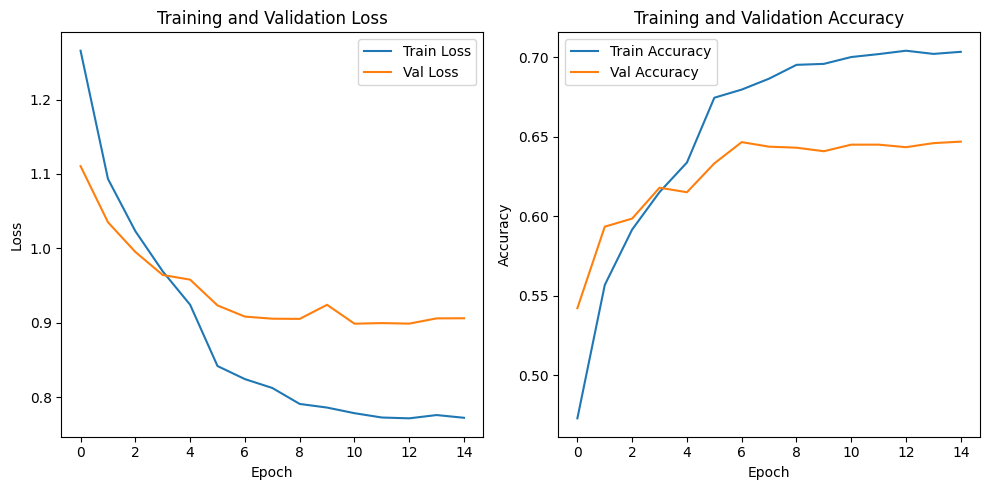

In [116]:
plot_training_history(train_loss_history, val_loss_history, train_acc_history, val_acc_history)

eval

Test Accuracy: 0.6430


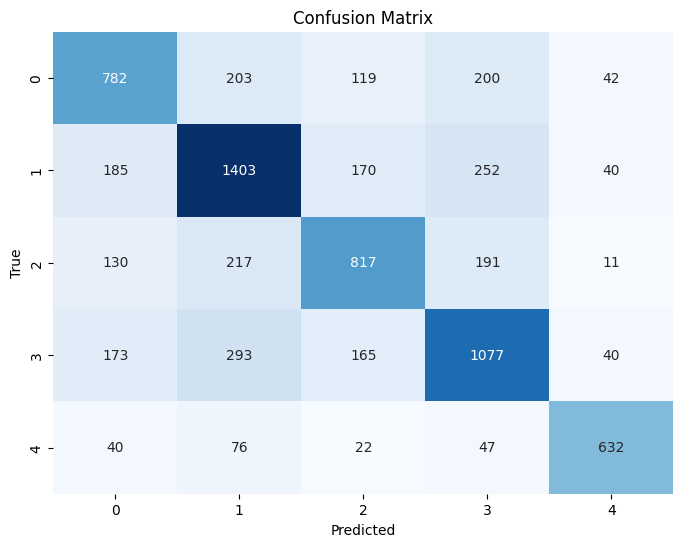

In [168]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_ft.eval()

predictions = []
true_labels = []

# Iterate over test loader
for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model_ft(inputs)
    _, preds = torch.max(outputs, 1)

    # Append predictions and true labels
    predictions.extend(preds.cpu().numpy())
    true_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Test Accuracy: {accuracy:.4f}')

# Create confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()